# **Exploratory Data Analysis on VideoGame Sales**

Source: https://www.kaggle.com/datasets/gregorut/videogamesales/

Mounting Google Drive for Drive access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Collection and Understanding**

### Background Information

The dataset which we are going to use to perform EDA on, is Video Game Sales. We have a huge dataset with sales dating from 1980 to 2020. The expected results should give us the understanding on number of sales, percentages, statistics of the companies etc., Video games played a important role in increasing the economic growth of many countries. Consumers of all ages between 10-50 involve in purchase of video games. They serve the purpose of fulfilling entertainment.

### Importing the DataSet and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /content/drive/MyDrive/Python_72541_MidtermProject

'EDA on Video Games DataSet.ipynb'   __pycache__   VgData.py   vgsales.csv


In [ ]:
try:
  vgs = pd.read_csv("/content/drive/MyDrive/Python_72541_MidtermProject/vgsales.csv")
except ValueError:
  print("file not found in directory")

### Displaying the details of the DataSet

In [ ]:
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgs.tail(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01


In [ ]:
print('The total number of items present in this DataSet are:',len(vgs))

The total number of items present in this DataSet are: 16598


In [ ]:
print('The total number of rows in the Dataset are',vgs.shape[0])

The total number of rows in the Dataset are 16598


In [ ]:
print('The total number of columns in the Dataset are',vgs.shape[1])

The total number of columns in the Dataset are 11


In [ ]:
print('The columns in the dataset are as follows:',vgs.columns)

The columns in the dataset are as follows: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:
print('Some more information on the DataSet:')
vgs.info()

Some more information on the DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Since our Dataset contains numerical data, let us get the description of the dataset

In [ ]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **Cleaning the DataSet**

Let us find the presence of Null values column-wise

In [ ]:
pp = vgs.isna().sum()
print('Columns with number of Null Values:')
print(pp)

Columns with number of Null Values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Now, let us drop the rows with missing values to clean the data set

In [ ]:
vgs1 = vgs.dropna()

In [ ]:
vgs1.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Now, we see that the Null values are removed from the dataset.

In [ ]:
vgs1.columns.unique()

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Let us find the unique values from each column to correct the data

In [ ]:
vgs1.Rank.unique().tolist()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186

In [ ]:
sorted(vgs1.Name.unique().tolist())

["'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Riven: The Psi-Climinal of Integral',
 '15 Days',
 '1701 A.D.',
 '18 Wheeler: American Pro Trucker',
 '18 Wheels of Steel: Ext

In [ ]:
sorted(vgs1.Platform.unique().tolist())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [ ]:
sorted(vgs1.Year.unique().tolist())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [ ]:
sorted(vgs1.Publisher.unique().tolist())

['10TACLE Studios',
 '1C Company',
 '20th Century Fox Video Games',
 '2D Boy',
 '3DO',
 '49Games',
 '505 Games',
 '5pb',
 '7G//AMES',
 '989 Sports',
 '989 Studios',
 'AQ Interactive',
 'ASC Games',
 'ASCII Entertainment',
 'ASCII Media Works',
 'ASK',
 'Abylight',
 'Acclaim Entertainment',
 'Accolade',
 'Ackkstudios',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Activision Value',
 'Activisional',
 'Adeline Software',
 'Aerosoft',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Alawar Entertainment',
 'Alchemist',
 'Alternative Software',
 'Altron',
 'Alvion',
 'American Softworks',
 'Angel Studios',
 'Answer Software',
 'Aqua Plus',
 'Aques',
 'Arc System Works',
 'Arena Entertainment',
 'Aria',
 'Arika',
 'ArtDink',
 'Aruze Corp',
 'Ascaron Entertainment',
 'Ascaron Entertainment GmbH',
 'Asgard',
 'Asmik Ace Entertainment',
 'Asmik Corp',
 'Aspyr',
 'Astragon',
 'Asylum Entertainment',
 'Atari',
 'Athena',
 'Atlus',
 'Avalon Interactive',
 'Avanquest',
 'Avanquest So

It is seen that the column 'Publisher' has a value called 'Activisional'. This is incorrect. Now let's try to replace 'Activisional' with 'Activision

In [ ]:
vgs2 = vgs1.replace('Activisional','Activision')

In [ ]:
sorted(vgs2.Publisher.unique().tolist())

['10TACLE Studios',
 '1C Company',
 '20th Century Fox Video Games',
 '2D Boy',
 '3DO',
 '49Games',
 '505 Games',
 '5pb',
 '7G//AMES',
 '989 Sports',
 '989 Studios',
 'AQ Interactive',
 'ASC Games',
 'ASCII Entertainment',
 'ASCII Media Works',
 'ASK',
 'Abylight',
 'Acclaim Entertainment',
 'Accolade',
 'Ackkstudios',
 'Acquire',
 'Activision',
 'Activision Blizzard',
 'Activision Value',
 'Adeline Software',
 'Aerosoft',
 'Agatsuma Entertainment',
 'Agetec',
 'Aksys Games',
 'Alawar Entertainment',
 'Alchemist',
 'Alternative Software',
 'Altron',
 'Alvion',
 'American Softworks',
 'Angel Studios',
 'Answer Software',
 'Aqua Plus',
 'Aques',
 'Arc System Works',
 'Arena Entertainment',
 'Aria',
 'Arika',
 'ArtDink',
 'Aruze Corp',
 'Ascaron Entertainment',
 'Ascaron Entertainment GmbH',
 'Asgard',
 'Asmik Ace Entertainment',
 'Asmik Corp',
 'Aspyr',
 'Astragon',
 'Asylum Entertainment',
 'Atari',
 'Athena',
 'Atlus',
 'Avalon Interactive',
 'Avanquest',
 'Avanquest Software',
 'Axela'

Now we have a DataSet which is cleaned of Null values and incorrect data.

# **Questions & Visualizations**

1. Total games produced by each Publisher

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

tot_games = vgs2.groupby('Publisher')['Name'].size().reset_index()
print(tot_games)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

                                  Publisher  Name
0                           10TACLE Studios     3
1                                1C Company     3
2              20th Century Fox Video Games     5
3                                    2D Boy     1
4                                       3DO    36
5                                   49Games     1
6                                 505 Games   192
7                                       5pb    61
8                                  7G//AMES     4
9                                989 Sports     1
10                              989 Studios    14
11                           AQ Interactive     5
12                                ASC Games     3
13                      ASCII Entertainment    20
14                        ASCII Media Works     9
15                                      ASK     1
16                                 Abylight     1
17                    Acclaim Entertainment   184
18                                 Accolade     3


2. Number of Games released in 1980 along with its sales

In [ ]:
x = vgs2[vgs2['Year']==1980].reset_index(drop=True)
prod_1980= x.drop(columns=['Rank','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
print(prod_1980)

              Name    Year     Genre   Publisher  Global_Sales
0        Asteroids  1980.0   Shooter       Atari          4.31
1  Missile Command  1980.0   Shooter       Atari          2.76
2          Kaboom!  1980.0      Misc  Activision          1.15
3         Defender  1980.0      Misc       Atari          1.05
4           Boxing  1980.0  Fighting  Activision          0.77
5       Ice Hockey  1980.0    Sports  Activision          0.49
6          Freeway  1980.0    Action  Activision          0.34
7           Bridge  1980.0      Misc  Activision          0.27
8         Checkers  1980.0      Misc       Atari          0.24


3. Number of Games released in 2000 along with its sales

In [ ]:
y = vgs2[vgs2['Year']==2000].reset_index(drop=True)
prod_2000= y.drop(columns=['Rank','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
print(prod_2000)

                                   Name    Year         Genre  \
0               Pokémon Crystal Version  2000.0  Role-Playing   
1                      Final Fantasy IX  2000.0  Role-Playing   
2                              Driver 2  2000.0        Action   
3              Tony Hawk's Pro Skater 2  2000.0        Sports   
4    Dragon Quest VII: Warriors of Eden  2000.0  Role-Playing   
..                                  ...     ...           ...   
344                       Point Blank 3  2000.0       Shooter   
345                      Airline Tycoon  2000.0    Simulation   
346                             Deus Ex  2000.0  Role-Playing   
347                    Crossroad Crisis  2000.0        Puzzle   
348                   PGA European Tour  2000.0        Sports   

              Publisher  Global_Sales  
0              Nintendo          6.39  
1            SquareSoft          5.30  
2                 Atari          4.73  
3            Activision          4.68  
4      Enix Corpora

4. Number of Games released in 2010 along with its sales

In [ ]:
z = vgs2[vgs2['Year']==2010].reset_index(drop=True)
prod_2010= z.drop(columns=['Rank','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
print(prod_2010)

                                                   Name    Year         Genre  \
0                                    Kinect Adventures!  2010.0          Misc   
1                           Pokemon Black/Pokemon White  2010.0  Role-Playing   
2                               Call of Duty: Black Ops  2010.0       Shooter   
3                               Call of Duty: Black Ops  2010.0       Shooter   
4                                        Gran Turismo 5  2010.0        Racing   
...                                                 ...     ...           ...   
1252              The Cages: Pro Style Batting Practice  2010.0        Sports   
1253                 Ishin no Arashi: Shippuu Ryuumeden  2010.0      Strategy   
1254          Slotter Mania P: Tetsuya Shinjuku vs Ueno  2010.0          Misc   
1255  Transformers: War for Cybertron (XBox 360, PS3...  2010.0       Shooter   
1256                                         Know How 2  2010.0        Puzzle   

                         Pu

5. Which 3 Publishers have released the highest number of games?

In [ ]:
publisher_count = vgs2['Publisher'].value_counts()
top_publish = publisher_count.nlargest(3)

for publisher, games in top_publish.iteritems():
    print(f"{publisher} = {games} ")

Electronic Arts = 1339 
Activision = 966 
Namco Bandai Games = 928 


6. Which 3 publishers have released the least number of games?

In [ ]:
least_publish = publisher_count.nsmallest(3)
for publisher, games in least_publish.iteritems():
    print(f"{publisher} = {games} ")

Wizard Video Games = 1 
Universal Gamex = 1 
Illusion Softworks = 1 


7. Which 3 publishers have the highest sales globally and their Sales Total?

In [ ]:
highest_sale_publish = vgs2.groupby('Publisher')['Global_Sales'].sum().nlargest(3)

for publisher, sales in highest_sale_publish.iteritems():
    print(f"{publisher} = {sales} ")



Nintendo = 1784.43 
Electronic Arts = 1093.39 
Activision = 721.41 


8. Which 3 publishers have the lowest sales globally and their Sales Total?

In [ ]:
lowest_sale_publish = vgs2.groupby('Publisher')['Global_Sales'].sum().nsmallest(3)

for publisher, sales in lowest_sale_publish.iteritems():
    print(f"{publisher} = {sales} ")

Ascaron Entertainment = 0.01 
Boost On = 0.01 
Commseed = 0.01 


9. Which game out of all has the most sales?

In [ ]:
vgs2['Total_Sale'] = vgs2['NA_Sales']+vgs2['EU_Sales']+vgs2['JP_Sales']+vgs2['Other_Sales']
fam_game = vgs2[vgs2['Total_Sale']==vgs2['Total_Sale'].max()]
print(f"{fam_game['Name'].values[0]} = {fam_game['Total_Sale'].values[0]} ")

Wii Sports = 82.74000000000001 


10. Which game out of all has the least sales?

In [ ]:
waste_game = vgs2[vgs2['Total_Sale']==vgs2['Total_Sale'].min()]
print(f"{waste_game['Name'].values[0]} = {waste_game['Total_Sale'].values[0]} ")

SCORE International Baja 1000: The Official Game = 0.0 


11. Total Sales by Region - North America, Europe, Japan, Other

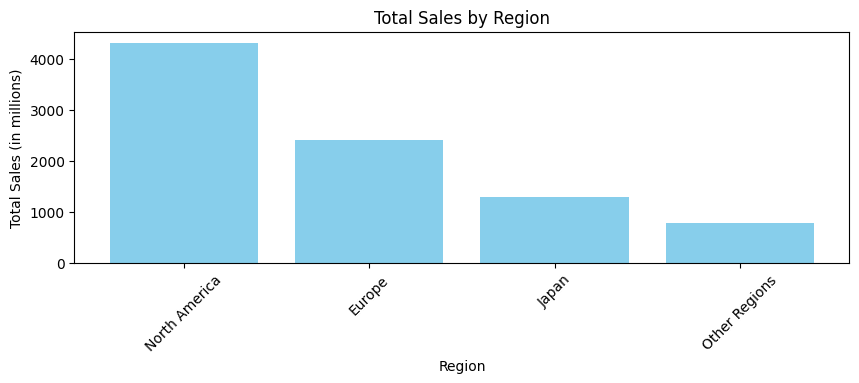

In [ ]:
region_sales = vgs2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
total_sales = region_sales.sum()
name = {'NA_Sales' : 'North America',
        'EU_Sales' : 'Europe',
        'JP_Sales' : 'Japan',
        'Other_Sales' : 'Other Regions'}

plt.figure(figsize=(10, 3))
plt.bar(name.values(), total_sales.values, color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)

plt.show()

12. Number of games released over the years

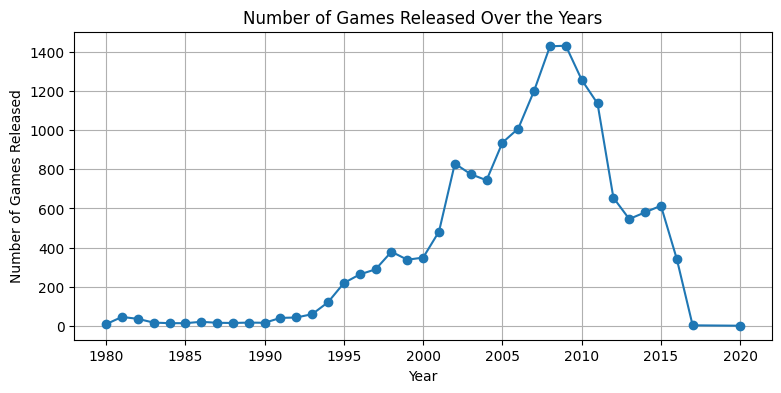

In [ ]:
game_count = vgs2.groupby('Year')['Name'].count().reset_index()
plt.figure(figsize=(9, 4))
plt.plot(game_count['Year'], game_count['Name'], marker='o', linestyle='-')
plt.title('Number of Games Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

13. Publishers publishing number of games between years 2017-2020

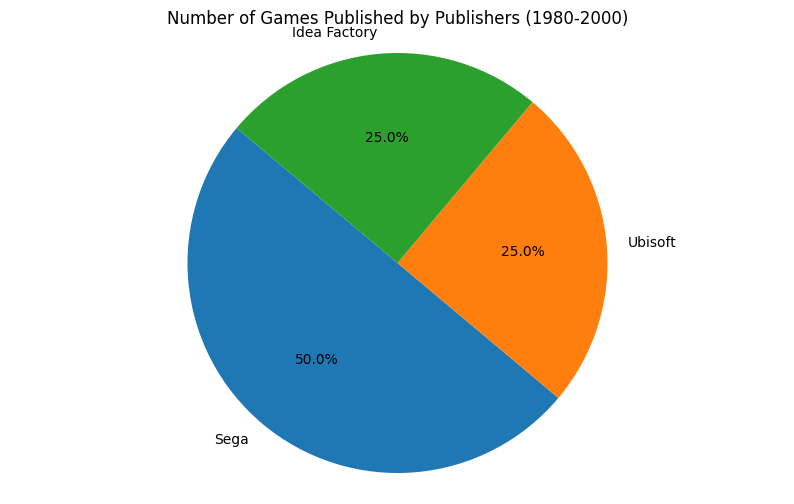

In [ ]:
date_range = vgs2[(vgs2['Year'] >= 2017) & (vgs2['Year'] <= 2020)]
publisher_game_counts = date_range['Publisher'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(publisher_game_counts, labels=publisher_game_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Games Published by Publishers (1980-2000)')
plt.axis('equal')

plt.show()

14. Top 5 games of Electronic Arts (which is the highest selling publisher across years) and their Global Sales


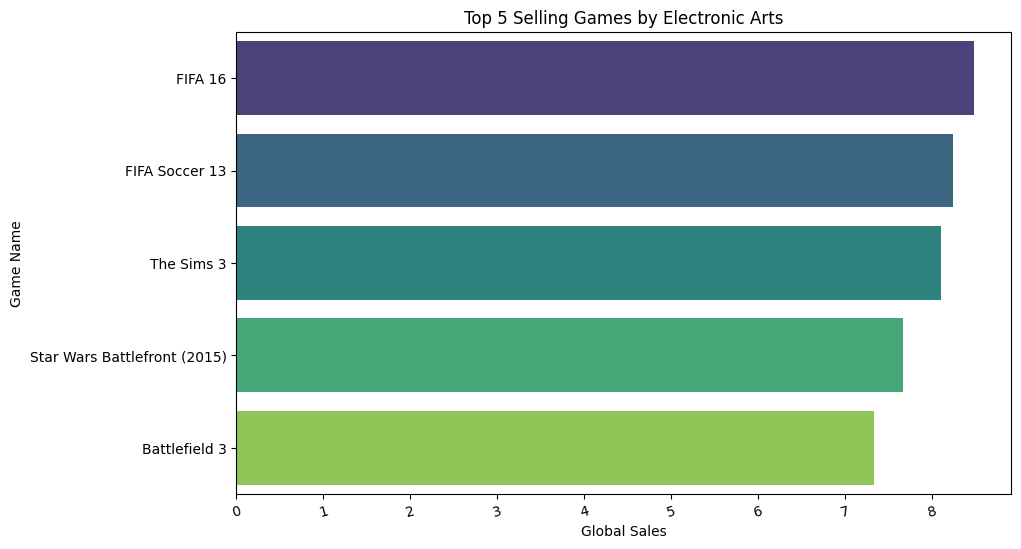

In [ ]:
pub_name = 'Electronic Arts'
publish = vgs2[vgs2['Publisher'] == pub_name]

sorted_data = publish.sort_values(by='Global_Sales', ascending=False)
top_5_games = sorted_data.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')
plt.xlabel('Global Sales')
plt.ylabel('Game Name')
plt.title(f'Top 5 Selling Games by {pub_name}')
plt.xticks(rotation=15)

plt.show()

15. Games with Sales between 15 to 20 sales

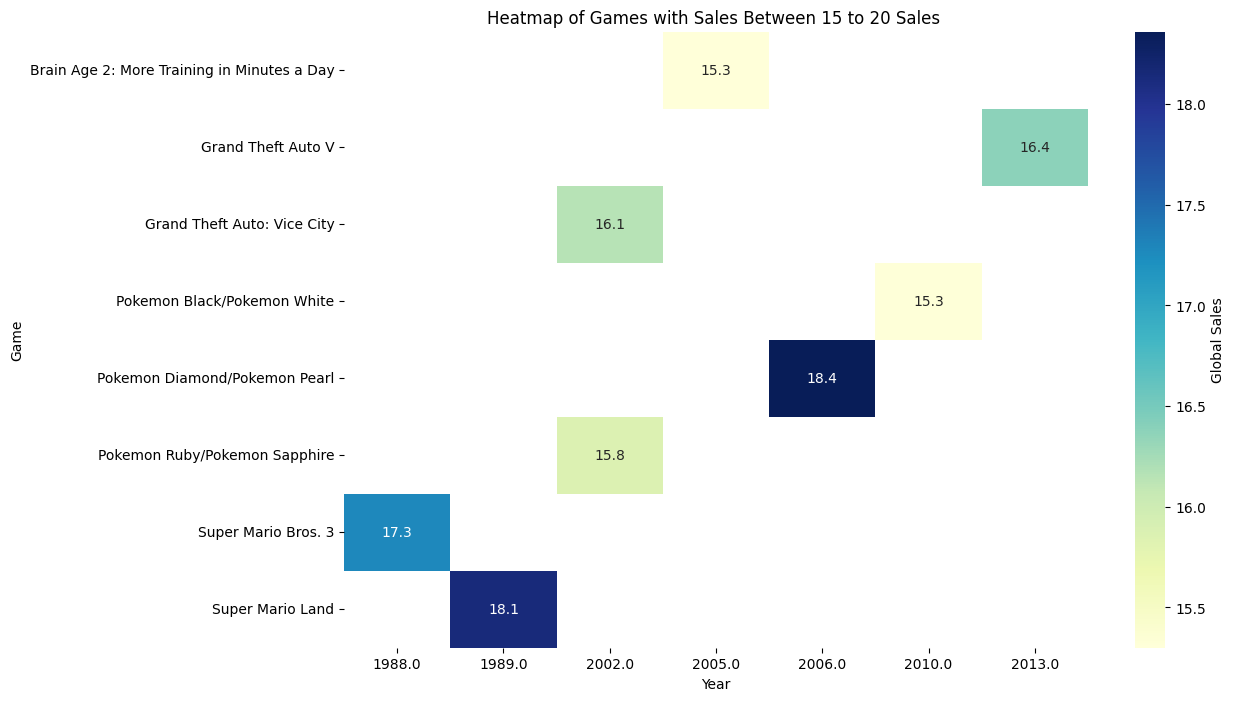

In [ ]:
filtered_games = vgs2[(vgs2['Global_Sales'] >= 15) & (vgs2['Global_Sales'] <= 20)]

heatmap_data = filtered_games.pivot('Name', 'Year', 'Global_Sales')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Global Sales'})
plt.xlabel('Year')
plt.ylabel('Game')
plt.title('Heatmap of Games with Sales Between 15 to 20 Sales ')

plt.show()

16. Histogram and PairPlot in Data Frames

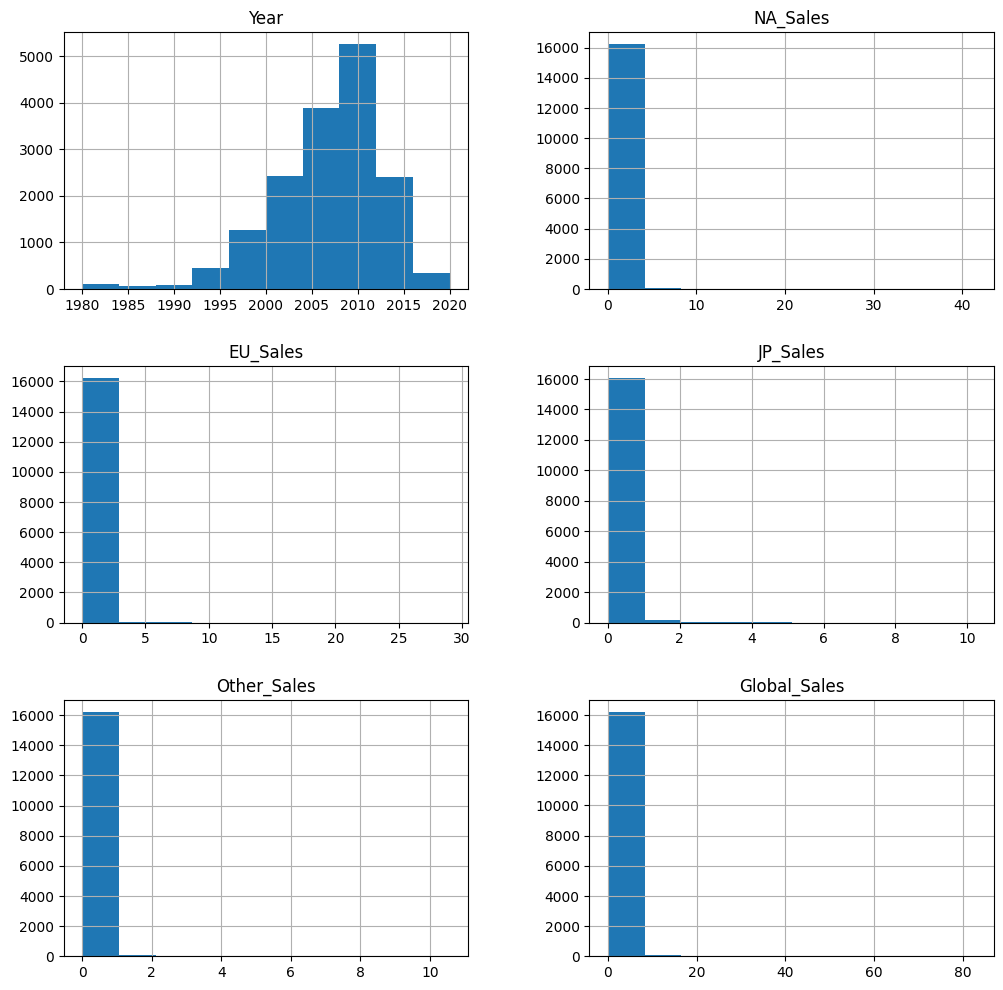

In [ ]:
a = ['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
vgs2[a].hist(figsize = (12,12))
plt.show()

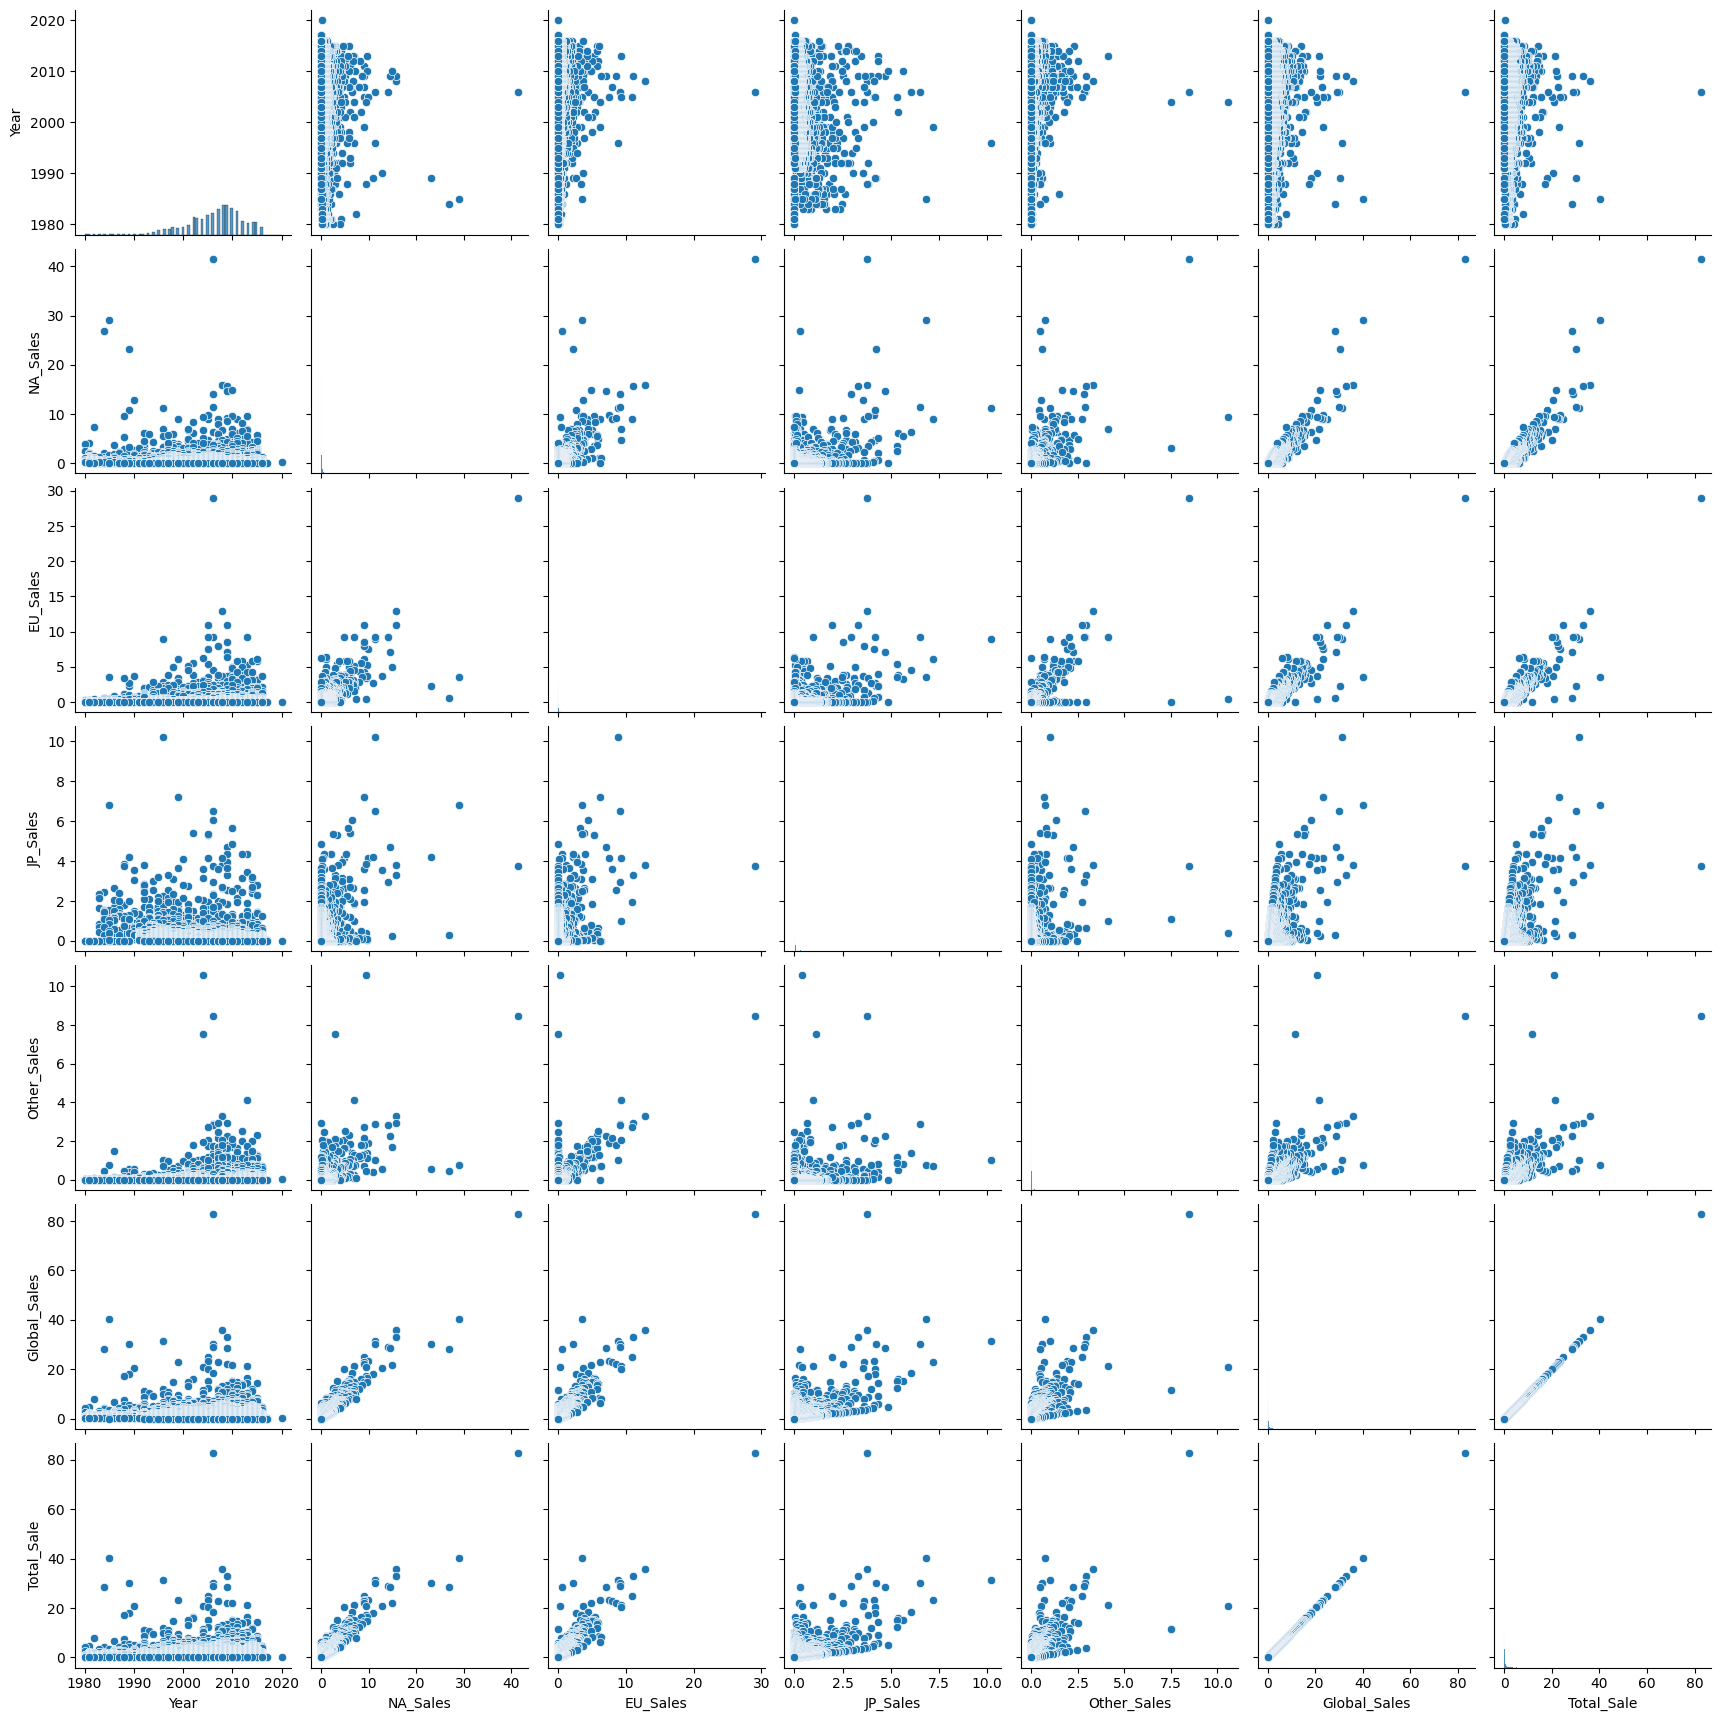

In [ ]:
b = vgs2.drop('Rank', axis=1)
sns.pairplot(b)
plt.show()

17. Electronic Arts sales rate across the years in a Scatterplot

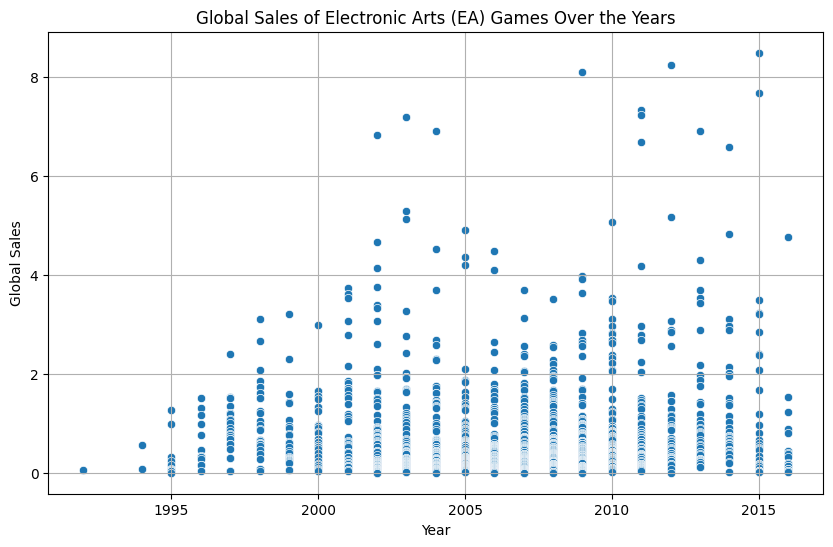

In [ ]:
filtered_data = vgs2[(vgs2['Year'] >= 1985) & (vgs2['Year'] <= 1990)]

ea_games = vgs2[vgs2['Publisher'] == 'Electronic Arts']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=ea_games)
plt.title('Global Sales of Electronic Arts (EA) Games Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)

plt.show()

18. Top 10 games with highest sales across North American region

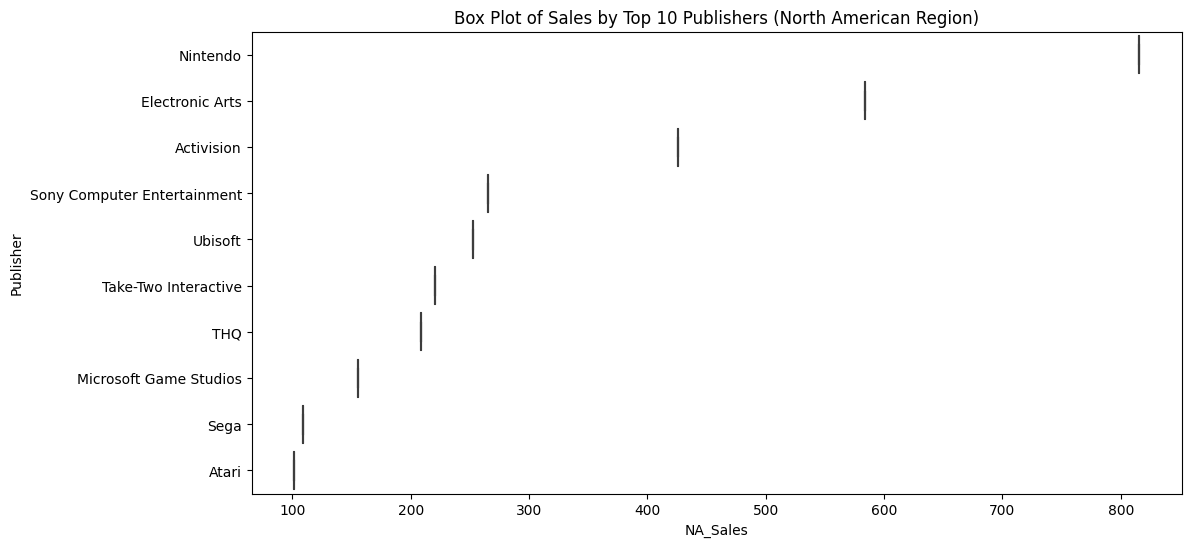

In [ ]:
publisher_sales = vgs2.groupby('Publisher')['NA_Sales'].sum().reset_index()

top_10_publishers = publisher_sales.sort_values(by='NA_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_publishers, x='NA_Sales', y='Publisher', orient='h')
plt.title('Box Plot of Sales by Top 10 Publishers (North American Region)')
plt.xlabel('NA_Sales')
plt.ylabel('Publisher')

plt.show()

19. Top 10 games with highest sales across Europe region

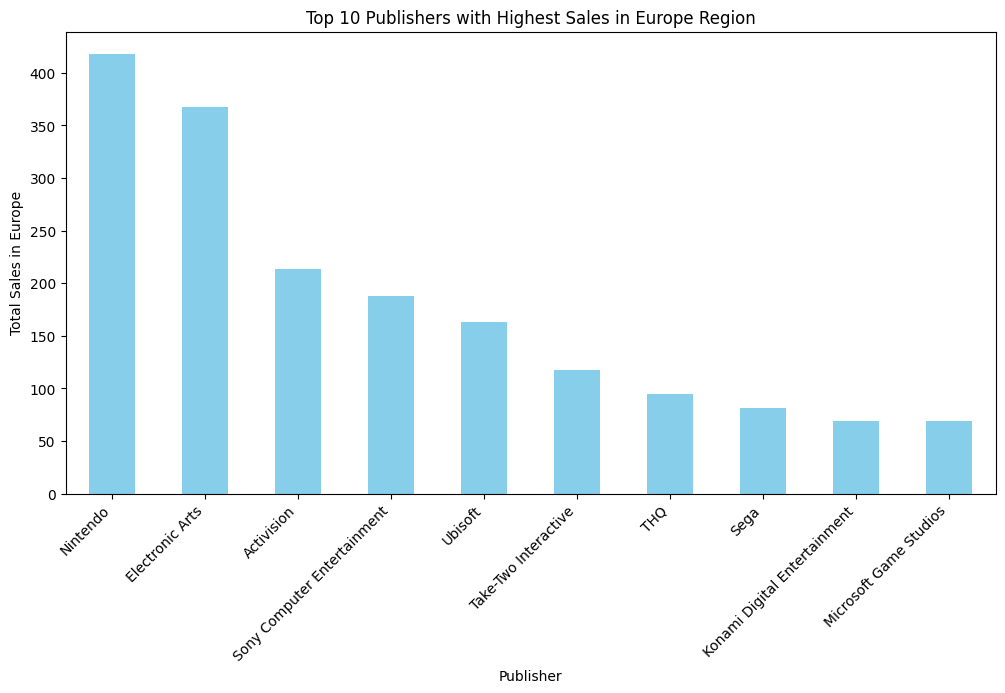

In [ ]:
publisher_sales_eu = vgs2.groupby('Publisher')['EU_Sales'].sum()

top_publishers_eu = publisher_sales_eu.nlargest(10)

plt.figure(figsize=(12, 6))
top_publishers_eu.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers with Highest Sales in Europe Region')
plt.xlabel('Publisher')
plt.ylabel('Total Sales in Europe')
plt.xticks(rotation=45, ha='right')

plt.show()

20. Top 10 games with highest sales across Japan region

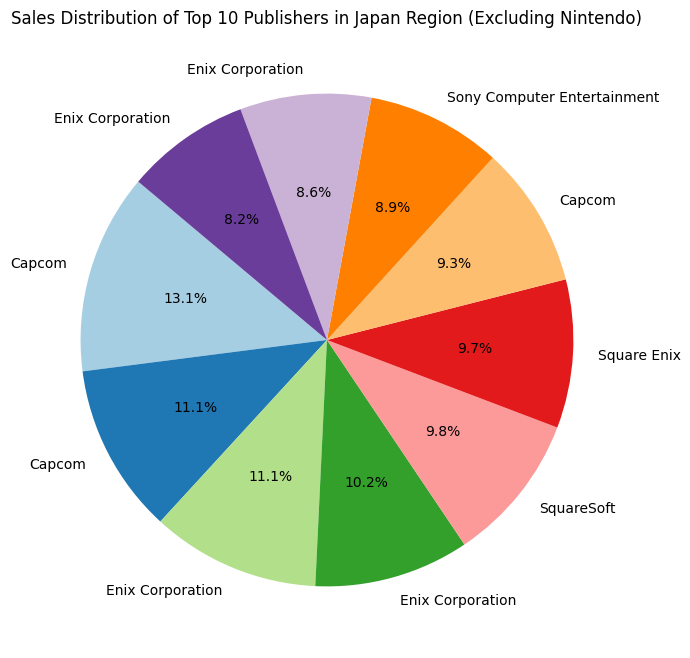

In [ ]:
filtered_publishers_jp = vgs2[vgs2['Publisher'] != 'Nintendo']


top_publishers_jp = filtered_publishers_jp.sort_values(by='JP_Sales', ascending=False).head(10)


publisher_names = top_publishers_jp['Publisher'].tolist()
sales_values = top_publishers_jp['JP_Sales'].tolist()


plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=publisher_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(publisher_names)))
)
plt.title('Sales Distribution of Top 10 Publishers in Japan Region (Excluding Nintendo)')
plt.show()

21. Highest Sales of games released on different Platform

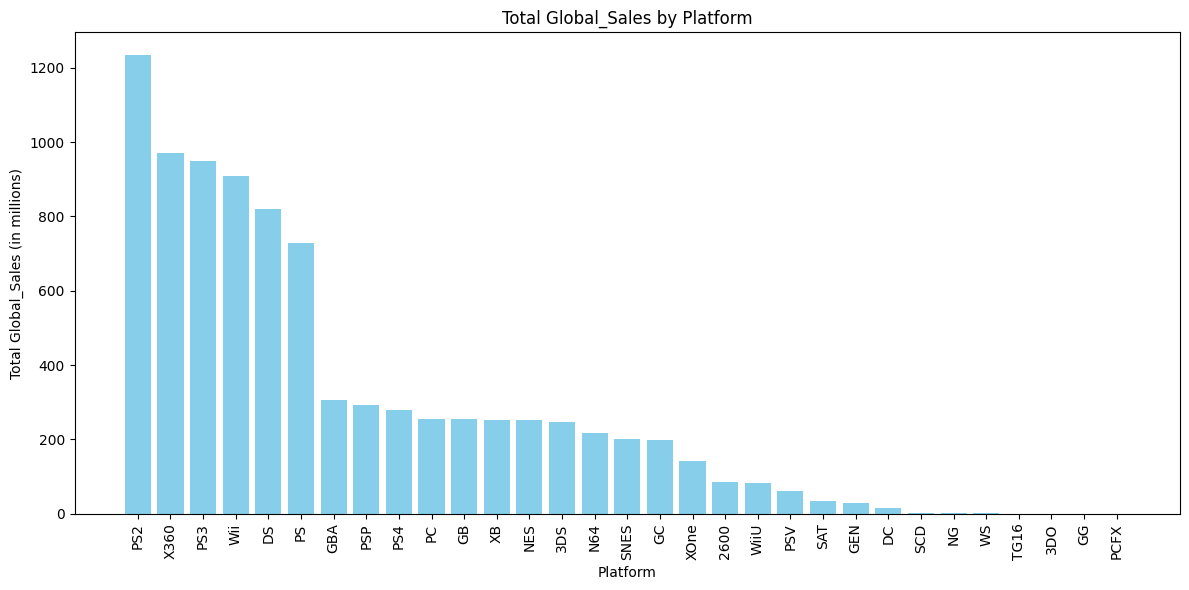

In [75]:
platform_sales = vgs2.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(12, 6))

region = 'Global_Sales'

sorted_data = platform_sales.sort_values(by=region, ascending=False)


plt.bar(sorted_data.index, sorted_data[region], color='skyblue')
plt.xlabel('Platform')
plt.ylabel(f'Total {region} (in millions)')
plt.title(f'Total {region} by Platform')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


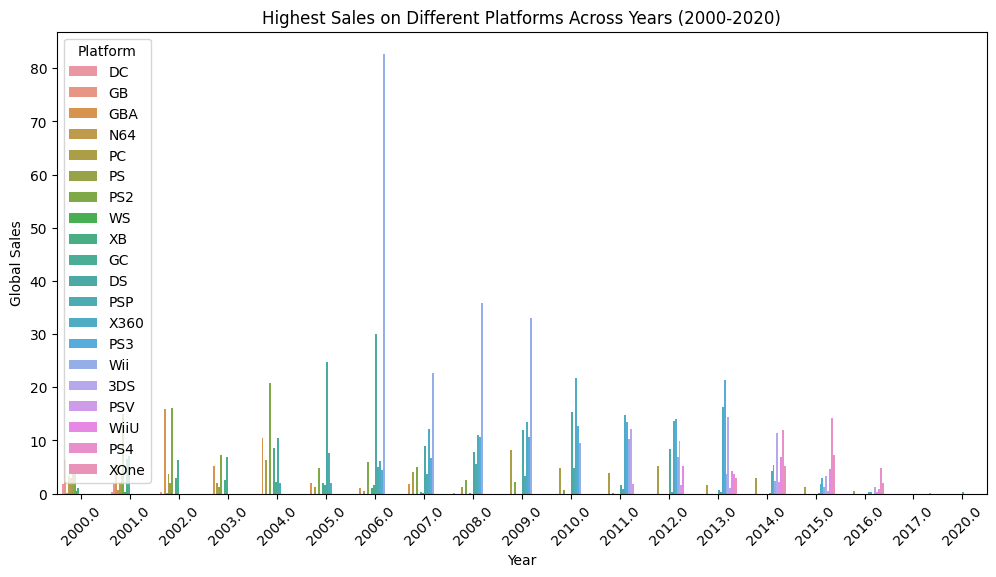

In [81]:
filtered_data = vgs2[(vgs2['Year'] >= 2000) & (vgs2['Year'] <= 2020)]

platform_max_sales = filtered_data.groupby(['Year', 'Platform'])['Global_Sales'].idxmax()

top_platforms = filtered_data.loc[platform_max_sales][['Year', 'Platform', 'Global_Sales']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms, x='Year', y='Global_Sales', hue='Platform', ci=None)
plt.title('Highest Sales on Different Platforms Across Years (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

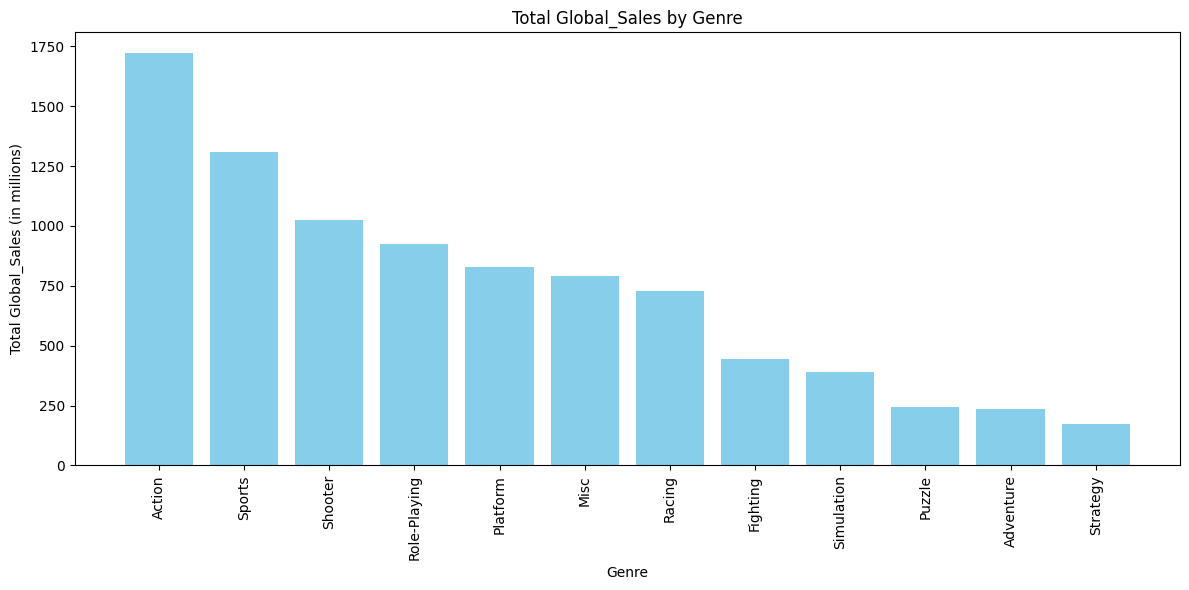

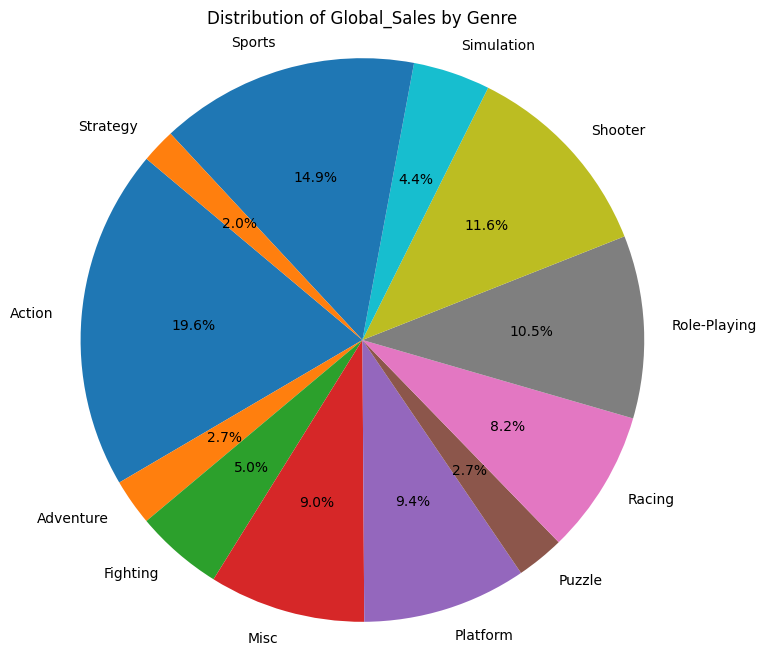

In [82]:
genre_sales = vgs2.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(12, 6))

region = 'Global_Sales'

sorted_data = genre_sales.sort_values(by=region, ascending=False)

plt.bar(sorted_data.index, sorted_data[region], color='skyblue')
plt.xlabel('Genre')
plt.ylabel(f'Total {region} (in millions)')
plt.title(f'Total {region} by Genre')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


#Pie chart

plt.figure(figsize=(8, 8))

region = 'Global_Sales'

total_sales = genre_sales[region].sum()

genre_sales['Percentage'] = (genre_sales[region] / total_sales) * 100

plt.pie(genre_sales['Percentage'], labels=genre_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title(f'Distribution of {region} by Genre')

plt.show()

# **Conclusion:**

* We have observed the dataset related to Video game sales for the span of years 1980 to 2020

* It is very clear from all the observations that 'Nintendo' publisher holds the top hand at selling VideoGames at all geo locations.

* Although Electronic Arta has the highest number of games released across the given years

* Other than 'Nintendo' the next top selling Video Game publishers are -

    North America - Electronic Arts

    Europe - Electronic Arts

    Japan - Capcom
* From the data we can observe that Nintendo will still be the leading seller of video games for the next few years
* And Electronic Arts will be the leader in releasing the highest number of games in the upcoming years
* We can also see that the most of revenue of the video games is coming from North American Region
* When it comes to the genre of the games, most sold games are 'Action' games and then come 'Sports' genre of games
